## Pendahuluan

Toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Data perlu di identifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kita dapat menemukan game yang paling potensial dan merencanakan kampanye iklannya. Untuk data terkait, data yang digunakan adalah data dari tahun 2016.  

## Tujuan 

Dari data yang tersedia, mari buat analisis dari suatu game yang dapat dikatakan berhasil atau tidak dan prediksikan game mana yang memiliki potensi besar di tahun tahun yang akan datang. Dari data yang sudah di analisis tersebut, kita dapat memuatan semacam perencanaan kampanye iklan pada game yang dikatakan behasil. 

## Tahapan

Ada beberapa tahapan dalam melakukan analisis data ini, diantaranya:

- Tahap 1. Import Library
- Tahap 2. Eksplorasi data
- Tahap 3. Pra-pemrosesan data
- Tahap 4. Analisis Data
- Tahap 5. Pemprofilan Pengguna Berdasarkan Wilayah
- Tahap 6. Uji Hipotesis
- Tahap 7. Kesimpulan Umum

## Deskripsi data

- **Name**: Nama game
- **Platform**: Nama platform
- **Year_of_Release**: Tahun rilis game
- **Genre**: Genre dari game
- **NA_sales**: Penjualan di Amerika Utara dalam satuan juta USD
- **EU_sales**: Penjualan di Eropa dalam satuan juta USD
- **JP_sales**: Penjualan di Jepang dalam satuan juta USD
- **Other_sales**: Penjualan di negara lainnya dalam satuan juta USD
- **Critic_Score**: Skor ulasan dari kritikus, maksimal 100 
- **User_Score**: Skor ulasan dari pengguna, maksimal 10
- **Rating**: Rating ESRB

## Tahap-1. Import Library

Mari muat semua library yang dibutuhkan dalam analisis ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

## Tahap-2. Eksplorasi Data 

### Memuat Data

Data pada analisis ini berada di /datasets/games.csv. Mari simpan data dengan variable bernama data.

In [2]:
path = '/datasets/games.csv'
data = pd.read_csv(path)

### Eksplorasi Data

Mari eksplorasi data yang dimiliki.

In [3]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9249,Ape Escape Academy (jp sales),PSP,2004.0,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
10292,Hellboy: The Science of Evil,X360,2008.0,Action,0.10,0.00,0.00,0.01,44.0,5.7,T
13543,Kamen Rider: Battride War Genesis,PS3,2016.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
9981,Where the Wild Things Are,Wii,2009.0,Platform,0.11,0.00,0.00,0.01,65.0,tbd,E10+
9714,Reader Rabbit Kindergarten,Wii,2010.0,Misc,0.12,0.00,0.00,0.01,NaN,tbd,E
15552,TV Anime Idolm@ster: Cinderella Girls G4U! Pac...,PS3,2015.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11608,Bleach: Heat the Soul 4,PSP,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
1163,Soul Edge,PS,1996.0,Fighting,0.61,0.41,0.46,0.10,NaN,NaN,NaN
4576,Batman: Arkham Origins Blackgate,PSV,2013.0,Action,0.16,0.17,0.00,0.10,61.0,6.8,T
6010,Marvel Super Hero Squad,PS2,2009.0,Fighting,0.14,0.11,0.00,0.04,NaN,tbd,E10+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.shape

(16715, 11)

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Kesimpulan

Ada beberapa kesimpulan dari eksplorasi data yang telah dilakukan, yaitu:
1. Data memuat 16715 baris dan 11 kolom.
2. Terdapat missing value pada 6 kolom yang berbeda, kolom tersebut adalah: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
3. Dari sample data yang ditampilkan, nama pada kolom-kolom memiliki nama yang belum seragam.
4. Tipe data pada beberapa kolom belum sesuai, diataranya dapa kolom: `Year_of_Release`, 

## Tahap-3. Pra-pemprosesan Data

### Pebaikan Nama Kolom

Nama pada kolom-kolom memiliki nama yang tidak seragam, maka dari itu mari seragamkan nama pada kolom-kolom tersebut dengan huruf kecil semua agar memudahkan proses analisis kedepannya.

In [7]:
data.columns = data.columns.str.lower() 

In [8]:
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Nama pada kolom sudah memiliki keseragaman dengan menggunakan huruf kecil semua.

### Eksplorasi Missing Value

Mari lakukan mngecekan missing value pada data yang ada. Mari cari tahu juga persentase dari seberapa besar missing value tersebut.

In [9]:
report_table = data.isna().sum().to_frame()
report_table = report_table.rename(columns={0: 'missing_values'})
report_table['% of total'] = ((report_table['missing_values'] / len(data)) * 100).round(2)
report_table.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
critic_score,8578,51.32
rating,6766,40.48
user_score,6701,40.09
year_of_release,269,1.61
name,2,0.01
genre,2,0.01
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


Dari data yang ditampilkan, terdapat missing value di 6 kolom yang berbeda. Mising value yang memiliki nilai yang paling rendah terdapat pada kolom `name` dan `genre` dengan nilai persentase hanya 0.01%. Pada kolom `year_of_release` terdapat 269 missing value dengan persentase 1.61%. Kolom sisanya yaitu kolom `critic_score`, `rating` dan `user_score` memiliki missing value dengan nilai cukup besar, hampir dari setengah data yang dimiliki pada 3 kolom tersebut adalah missing value.

Mari eksplorasi lebih dalam tengtang missing value.

#### Missing Value 1

Mari ekplorasi missing value pada kolom yang memiliki nilai persentase terendah.

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Dari data yang ditampilkan, ternyata pada kolom `name` dan `genre` memiliki keterikatan yang sama pada missing value atau dalam kata lain missing value pada kolom `name` terjadi juga pada kolom `genre`. Maka dari itu mising value pada keduanya dapat di drop saja mengingat nilai persentase missing value yang terjadi pada 2 kolom ini sangat kecil. Jadi data keduanya bisa di drop dan tidak akan menggangu proses analisis kedepannya.  

#### Missing Value 2

Mari lanjutkan ekplorasi missing value pada kolom selanjunya.

In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Pada kolom ini terdapat 269 missing value didalamnya. Untuk kolom ini karena kolom ini berisi tahun rilis dari suatu game, maka dari itu untuk mengatasi missing value pada kolom ini dapat mengganti missing valeu tersebut dengan angka 0. Angka 0 ini berari tahun rilis tidak diketahui.

#### Missing Value 3

Mari lanjutkan ekplorasi missing value pada 3 kolom sisanya yang memiliki persentase missing value yang cukup besar.

In [13]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Dari ketiga kolom ini, missing value yang terjadi cukup banyak mengingat persentase missing value yang ditampilkan hampir dari setengah data yang ada. Untuk kasus ini, sementara dibiarkan terlebih dahulu agar tidak menggaggu proses analisis yang akan dilakukan.  

### Mengatasi Missing Value

#### Mengatasi Missing-value 1

Pada bagian missing value 1, terdapat 2 kolom yang memiliki missing value yang saling berkaitan. Karena pada temuan di missing value 1 sudah ditentukan untuk ngedrop data pada 2 kolom ini, maka dari itu missing value pada 2 kolom ini yang memeiliki missing value akan di hapus dari data keseluruhan.

In [16]:
data = data.dropna(subset=['name', 'genre'])

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Terlihat dari data yang ditampilkan diatas, pada kolom `name` dan kolom `genre` sudah menghasilkan nilai 0. Itu berarti pada 2 kolom tersebut sudah tidak ada missing value atau data pada 2 kolom tersebut yang memiliki missing value sudah berhasil dihapus.

#### Mengatasi Missing-value 2

Pada bagian ini sesuai dengan temuan pada bagian missing value 2, missing value yang terdapat pada kolom `year_of_release` akan dirubah atau diganti nilai nya dengan nilai 0. Nilai 0 disini menandakan bahwa missing value pada kolom ini tidak diketahui tahun rilisnya. Mari isi missing value pada kolom `year_of_release` dengan angka 0.

In [18]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [19]:
data[data['year_of_release']== 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Dari data yang ditampilkan diatas, nilai pada kolom `year_of_release` sudah menampilkan hasil 0. Artinya missing value pada kolom ini sudah tidak ada atau dalam kata lain, missing value pada kolom ini sudah berhasil diganti dengan nilai 0.

#### Mengatasi Missing-value 3

Untuk bagian ini, sesuai dengan temuan pada bagian missing value 3. Pada kolom `critic_score`, `rating`, dan `user_score` missing value untuk sementara dibiarkan terlebih dahulu, mengingat nilai persentase missing value pada 3 kolom ini memiliki nilai yang sangat besar atau hampir dari setengah data yang dimiliki. Maka pada bagian ini missing value di skip terlebih dahulu.

### Mengatasi Tipe Data

Langkah selanjutnya, mari amati lebih lanjut mengenai tipe data pada kolom-kolom yang ada.

In [21]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13523,Operation Flashpoint: Elite,XB,2005.0,Shooter,0.03,0.01,0.00,0.00,64.0,8.3,T
5214,LEGO Racers,PS,1999.0,Racing,0.20,0.14,0.00,0.02,NaN,NaN,NaN
3995,Super Robot Taisen Z,PS2,2008.0,Strategy,0.00,0.00,0.50,0.00,NaN,NaN,NaN
3286,Robotech: Battlecry,PS2,2002.0,Shooter,0.30,0.23,0.00,0.08,72.0,8.5,T
10722,The Land Before Time: Great Valley Racing Adve...,PS,2001.0,Racing,0.05,0.04,0.00,0.01,NaN,NaN,NaN
3402,Extreme-G,N64,1997.0,Racing,0.47,0.11,0.00,0.01,NaN,NaN,NaN
1437,Battlefield 4,PC,2013.0,Shooter,0.39,0.87,0.00,0.10,81.0,6,M
16641,Hoshizora no Comic Garden,DS,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14852,Prince of Persia (2008),PC,2008.0,Action,0.00,0.02,0.00,0.00,NaN,NaN,NaN
16644,Eve: Burst Error R,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [22]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Ada beberapa catatan untuk tahap ini, diantaranya:
1. Pada kolom `year_of_release` tipe datanya float, namun isi dari kolom tersebut adalah tahun game rilis.
2. Pada kolom `user_score` tipe datanya object, namun isi dari kolom tersebut adalah score dari setiap game.

Dari beberapa temua diatas, dapat disimpulkan bahwa pada kolom `year_of_release` tipe data harus dirubah ke integer karena nilai dari tahun rilis tidak ada nilai koma (,). Untuk kolom `user_score` tipe datanya object, mungkin dikarenakan ada nilai TDB disana. Untuk itu mari rubah nilai TDB menjadi NaN dan tipe data pada kolom `user_score` dirubah menjadi float.

#### Merubah Tipe Data

Mari rubah terlebih dahulu tipe data pada kolom `year_of_release` menjadi integer.

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [24]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
9.6       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [25]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [26]:
data['user_score'] = data['user_score'].astype('float')

In [27]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Dari data yang ditampilkan, terlihat pada kolom `year_of_release` tipe datanya sudah berubah menjadi integer dan pada kolom `user_score` tipe datanya sudah berubah menjadi float. Artinya untuk mengatasi tipe data pada data yang dimiliki sudah berhasil diatasi. 

### Menghitung Total Penjualan 

Untuk tahap ini ada beberapa kolom yang dibutuhkan untuk menghitung total keseluruhan penjualan. Sebelum itu mari tampilkan data sampel untuk memastikan kolom mana saja yang dibutuhkan.

In [28]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14234,Hayate no Gotoku! Ojousama Produce Daisakusen ...,DS,2008,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5833,"Army Men World War: Land, Sea, Air",PS,2000,Action,0.17,0.12,0.00,0.02,NaN,NaN,NaN
9969,Yattaman DS: BikkuriDokkiri Daisakusen da Koron,DS,2008,Action,0.00,0.00,0.12,0.00,NaN,NaN,NaN
15489,Agatha Christie: The ABC Murders,PC,2016,Adventure,0.00,0.02,0.00,0.00,66.0,8.5,NaN
9650,Peter Jacobsen's Golden Tee Golf,PS,2000,Sports,0.07,0.05,0.00,0.01,NaN,NaN,NaN


Untuk menghitung total keseluruhan penjualan, ada 4 kolom yang dibutuhkan. Kolom tersebut adalah `na_sales`, `eu_sales`, `jp_sales` dan `other_sales`.

Mari buat kolom baru dengan nama `total_sales` yang akan berisi nilai dari keseluruhan penjualan. Caranya adalah dengan menjumlahkan ke 4 kolom tersebut lalu simpan hasil nya di kolom `total_sales`. Mari buat kolom total penjualan.

In [29]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [30]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10205,Batman & Robin,PS,1998,Action,0.06,0.04,0.0,0.01,NaN,NaN,NaN,0.11
11808,Gladius,GC,2003,Strategy,0.06,0.01,0.0,0.00,82.0,8.8,T,0.07
8507,Midway Arcade Treasures 2,GC,2004,Misc,0.13,0.03,0.0,0.00,74.0,NaN,M,0.16
12751,Tropico 5,X360,2014,Simulation,0.03,0.02,0.0,0.00,71.0,7.2,T,0.05
2376,Crimson Skies: High Road to Revenge,XB,2003,Simulation,0.65,0.19,0.0,0.03,88.0,8.8,T,0.87


Dari data sampel diatas terlihat bahwa kolom `total_sales` sudah berhasil ditambahkan ke dalam data yang dimiliki.

### Kesimpulan 

Ada beberapa kesimpulan dari langkah-langkah yang telah dilakukan diatas, yaitu:
1. Merubah keseluruhan nama kolom menjadi seragam dengan menggunakan huruf kecil semuanya.
2. Mising value pada kolom `name` dan `genre` datanya di drop karena persentase missing value pada 2 kolom tersebut sangat kecil dan tidak akan mengganggu proses analisis.
3. Mising value pada kolom `year_of_release` diisi dengan angka 0 untuk menandakan bahwa tahun rilis tidak diketahui.
4. Mising value pada kolom `critic_score`, `user_score` dan `rating` di biarkan terlebih dahulu karena persentase missing value dari ketiga kolom tersebut sangat besar. 
5. Tipe data pada kolom `year_of_release` dirubah menjadi integer.
6. Nilai tbd pada kolom `user_score` diganti dengan missing value atau NaN.
7. Tipe data pada kolom `user_score` dirubah menjadi float.

## Tahap-4. Analisis Data

Ada beberapa point yang akan dianalisis, diantaranya:
1. Berapa banyak game yang dirilis pada tahun yang berbeda. Apakah data di setiap periode signifikan?
2. Bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun. Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?
3. Tentukan periode waktu pengambilan data. Untuk melakukannya, lihat jawabanmu di pertanyaan sebelumnya. Data yang diambil seharusnya memungkinkan untuk membangun model bagi tahun 2017.
4. Platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut? Pilih beberapa platform yang berpotensi menghasilkan keuntungan.
5. Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform? Deskripsikan penemuanmu.
6. Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (sesuai hasil sebelumnya). Buat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Kemudian, tarik kesimpulannya.
7. Dari kesimpulan yang didapat sebelumnya, bandingkan penjualan game yang sama di platform lain.
8. Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

### Analisis 1

Analisis pertama yaitu mencari tahu berapa banyak game yang dirilis pada tahun yang berbeda. Apakah data di setiap periode signifikan atau tidak. Mari tampilkan terlebih dahulu data sampel yang dimiliki agar dapat memutuskan kolom mana yang akan digunakan sebagai analisis ini.

In [31]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Pada bagian analisis ini kolom yang akan digunakan adalah kolom `year_of_release` dan `name` lalu gunakan count untuk mengihtung sebarapa banyak game nya.

In [32]:
game_year = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
game_year = game_year.drop(index=0).reset_index()
game_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Dari hasil yang ditampilkan diatas, mari buat visualisasinya agar lebih mudah melakukan analisis.

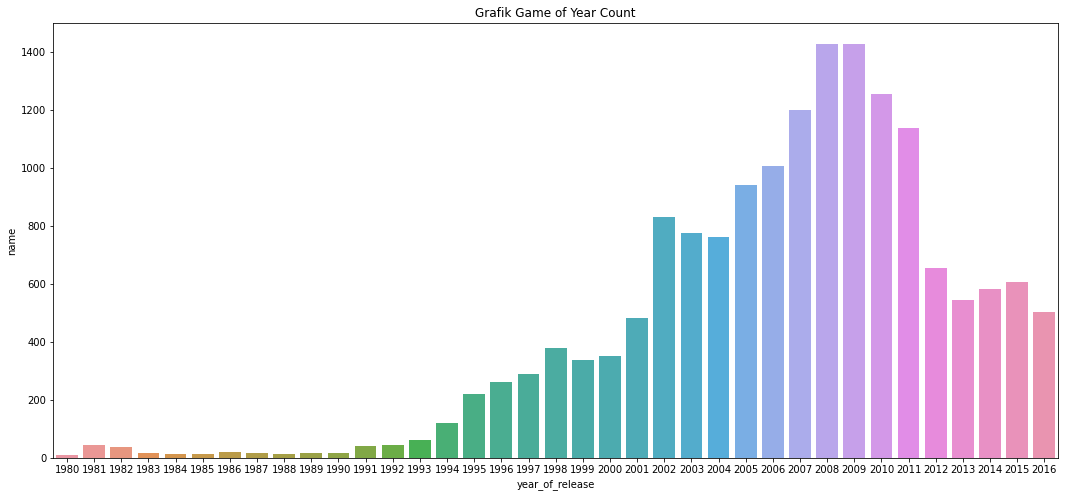

In [33]:
plt.figure(figsize=(18, 8))
plt.title('Grafik Game of Year Count')
sns.barplot(data=game_year, x='year_of_release', y='name')
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisi pertama ini, diantaranya:
1. Dari tahun 1980-2009 perkembangan game cukup fluktuatif, namun terlihat game yang ada cenderung naik setiap tahunnya.
2. Puncak dari banyak nya game yang dirilis berada pada tahun 2008 dan 2009 dengan jumlah game lebih dari 1400 game.
3. Pada tahun 2009-2016 jumlah game yang rilis cenderung menurun setiap tahunnya.
4. Game yang dirilis pada 5 tahun terakhir cenderung signifikan negarif atau mengalami penurunan dengan fluktuasi yang beragam.



### Analisis 2

Bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun. Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [35]:
platform_sales = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


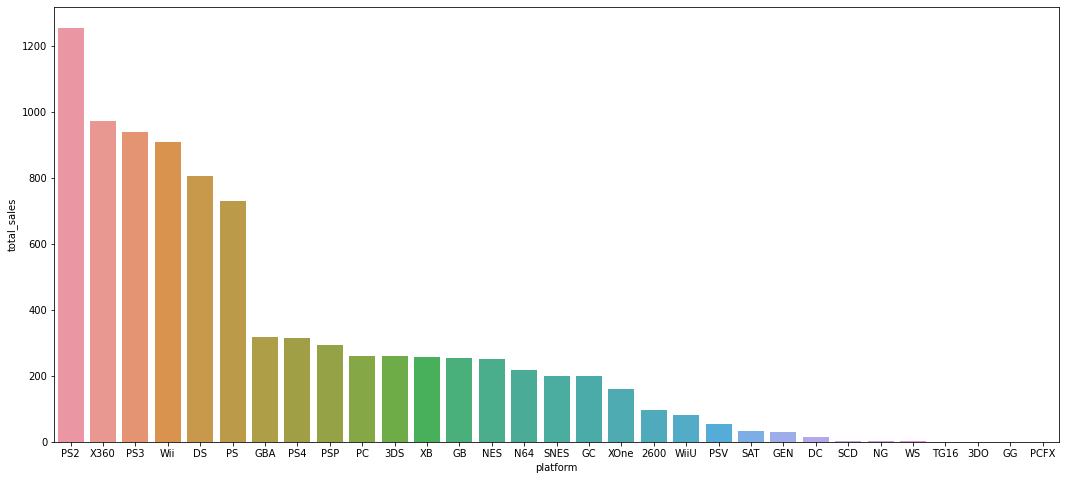

In [36]:
plt.figure(figsize=(18, 8))
sns.barplot(data=platform_sales, x='platform', y='total_sales')
plt.show()

Dari data yang ditampilkan ternyata platform yang memiliki penjualan terbesar adalah platform PS2 dengan total penjualan lebih dari 1200 Dolar. Diikuti dengan platform-platform lain yang memiliki penjualan dibawah 1000 dolar.

Karena platform yang terbesar adalah PS2, maka dari itu mari buat distribusi data nya berdasarkan tahun. Mari cari tahu seberapa bervariasi penjualan dari platform PS2.

In [37]:
top_platform_sales = data.loc[data['platform'].isin(['PS2'])]
top_platform_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [38]:
PS2 = pd.pivot_table(top_platform_sales, index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
PS2 = PS2.drop(index=0)
PS2

,year_of_release,total_sales
1,2000,39.17
2,2001,166.43
3,2002,205.38
4,2003,184.31
5,2004,211.81
6,2005,160.66
7,2006,103.42
8,2007,75.99
9,2008,53.90
10,2009,26.40


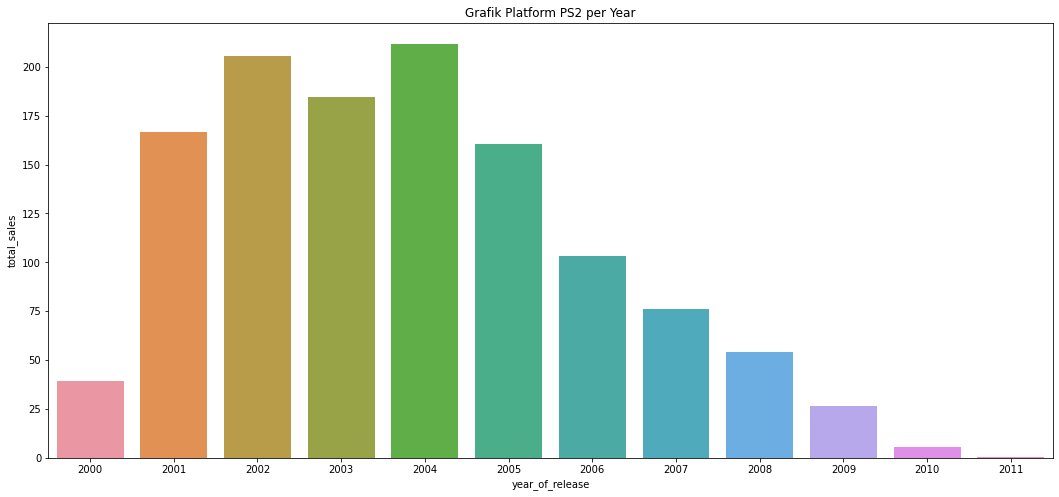

In [39]:
plt.figure(figsize=(18, 8))
plt.title('Grafik Platform PS2 per Year')
sns.barplot(data=PS2, x='year_of_release', y='total_sales')
plt.show()

Dari grafik yang ditampilkan, penjualan dari platform PS2 memiliki penjualan yang cukup bervariasi setiap tahunnya. Ada beberapa point yang bisa dicatat dari data yang dihasilkan, diantaranya:
1. Untuk tahun 0 diabaikan karena tahun rilis tidak diketahui.
2. Tahun 2004 adalah puncak dari penjualan di platform PS2 dengan penjualan lebih dari 210 Dolar.
3. Tahun 2005-2011 penjualan pada platform PS2 mengalami penurunan yang cukup signifikan.
4. Tahun 2011 adalah titik terendah dari penjualan di platform PS2 dengan penjualan lebih dari 1 Dolar.

Langkah selanjutnya adalah mencari tahu seberama lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya.

In [40]:
timeline_platform = pd.pivot_table(data, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
timeline_platform = timeline_platform.drop(index=0)
timeline_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Mari periksa 3 platform dengan penjualan terbesar, berapa lama waktu yang dibutuhkan untuk plantform muncul dan memudar.

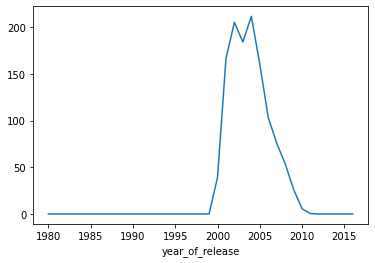

In [41]:
timeline_platform['PS2'].plot();

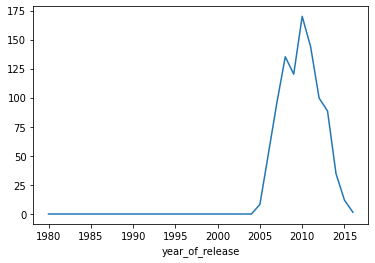

In [42]:
timeline_platform['X360'].plot();

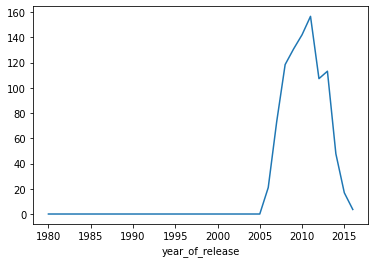

In [43]:
timeline_platform['PS3'].plot();

Dari 3 platform diatas, rata-rata menampilkan rentang waktu pada saat platform itu populer adalah sekitar 10 tahun. Angka yang ditampilkan pun cukup unik yaitu 5 tahun adalah dimana platfrom beranjak naik hingga populer dan 5 tahun kemudian adalah dimana platform beranjak turun hingga menjadi kurang populer.

**Kesimpulan**

Ada beberapa kesimpulan dari analisis kedua ini, yaitu:
1. PS2 adalah platform yang memiliki penjualan tertinggi dengan nilai penjualan sekitar lebih dari 1200
2. Tahun 2004 adalah puncak dari penjualan di platform PS2 dengan penjualan lebih dari 210 Dolar.
3. Dari 3 platform yang dibandingkan yaitu platform PS2, PS3 dan XOne rentang waktu pada saat platform itu populer adalah sekitar 10 tahun. 5 tahun adalah dimana platfrom beranjak naik hingga populer dan 5 tahun kemudian adalah dimana platform beranjak turun hingga menjadi kurang populer.

### Analisis 3

Mari tentukan periode waktu pengambilan data. Karena tujuan dari analisis ini adalah untuk membangun model pada tahun 2017 dan hasil dari analisis sebelumnya menyatakan bahwa 5 tahun adalah proses naiknya platform hingga populer dan 5 tahun kemudian adalah prosesn dimana turunnya platform hingga kurang populer. Maka dari itu mari lakukan pengambilan data dengan periode dibawah 5 tahun agar game yang akan dimodelkan pada tahun 2017 masih relevan dengan tahun-tahun sebelumnya.

Karena analisis ini akan digunakan untuk memodelkan game yang akan digunakan pada tahun 2017, Maka dari itu mari ambil data dengan rentang waktu 5 tahun kebelakang. Berarti data yang diambil adalah game yang rilis ditahun 2012 hingga 2016.

In [44]:
new_df = data[data['year_of_release'] >= 2012].fillna(0).reset_index(drop=True)
new_df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2560,Winning Post 8 2016,PS4,2016,Simulation,0.00,0.00,0.02,0.00,0.0,0.0,0,0.02
584,FIFA Soccer,PSV,2012,Sports,0.16,0.32,0.02,0.08,79.0,7.2,E,0.58
1970,Pretty Cure All Stars Everyone Gather ? Let's ...,Wii,2013,Misc,0.00,0.00,0.05,0.00,0.0,0.0,0,0.05
808,DiRT Rally,PS4,2016,Racing,0.04,0.27,0.00,0.05,85.0,8.1,E,0.36
2705,The Legend of Heroes: Trails in the Sky Third ...,PS3,2013,Role-Playing,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 270.7+ KB


**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Dari hasil analisis sebelumnya menyatakan bahwa rentang waktu game populer hingga tidak populer adalah 10 tahun. 5 tahun adalah proses dimana game menuju populer dan 5 tahun lagi adalah proses dimana game mengalami penurunan.
2. Rentang waktu yang diambil untuk memodelkan game pada tahun 2017 adalan 5 tahun.
3. Pengambilan data diambil dari tahun 2012-2016 agar data yang digunakan masih relevan.

### Analisis 4

Tahap ini mari cari tahu platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut? dan pilih beberapa platform yang berpotensi menghasilkan keuntungan.

In [46]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [47]:
new_platform_sales = pd.pivot_table(new_df, index='platform', values='total_sales', aggfunc='sum').fillna(0).sort_values(by='total_sales').reset_index()
new_platform_sales

,platform,total_sales
0,PSP,11.19
1,DS,12.55
2,Wii,35.37
3,PSV,49.18
4,PC,62.65
5,WiiU,82.19
6,XOne,159.32
7,3DS,194.61
8,X360,236.54
9,PS3,288.79


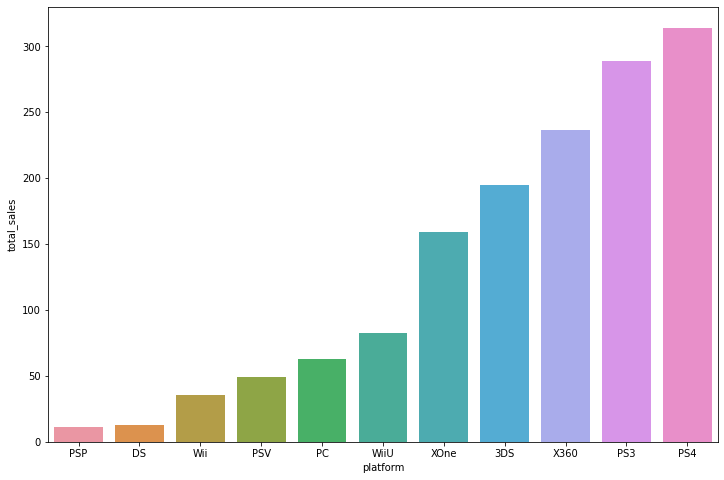

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_platform_sales, x='platform', y='total_sales');

Dari grafik yang ditampilkan, didapat bahwa platform yang memiliki penjualan tertinggi selama 5 tahun kebelakang adalah platform PS4 dan platform yang memiliki penjualan terendah adalah platform PSP.

Mari kelompokan berdasarkan tahun rilis, platform mana yang mungkin masih memiliki potensi untuk tahun 2017. 

In [49]:
new_platform_year = pd.pivot_table(new_df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
new_platform_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


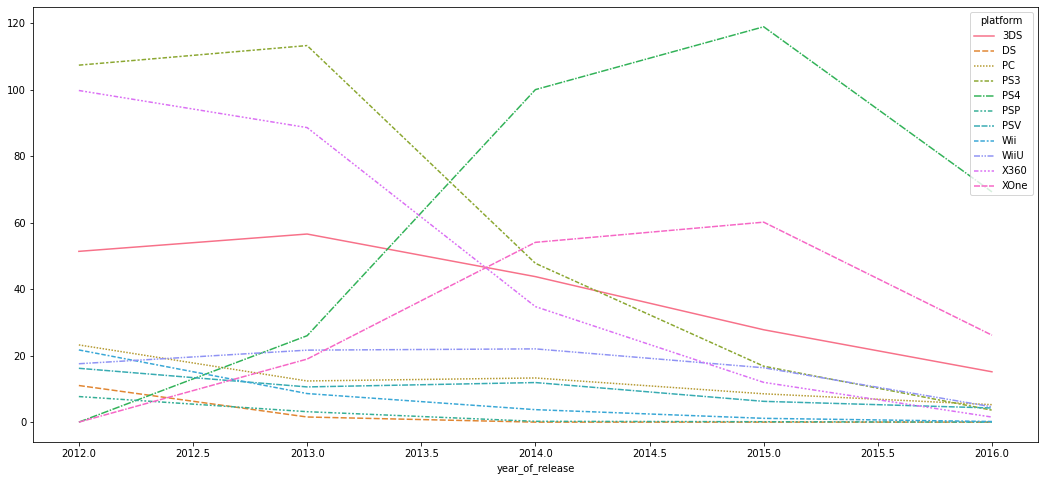

In [50]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=new_platform_year);

Dari data yang ditampilkan, tampak bahwa penjualan di setiap paltform pada tahun 2011-2016 mengalami penurunan yang cukup signifikan, namun ada beberapa platform yang masih memiliki potensi yang akan menghasilkan keuntungan di tahun 2017. Dari data terlihat ada beberapa lineplot yang tidak terlalu menurun di tahun 2016. Platform tersebut adalah PS4 dan XOne. Mari lihat lebih jelas platform dari keduanya. 

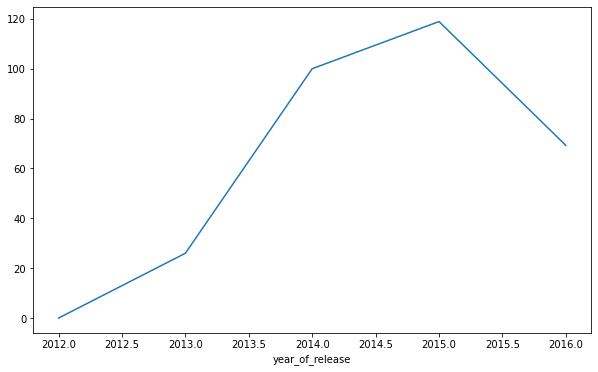

In [51]:
new_platform_year['PS4'].plot(figsize=(10, 6));

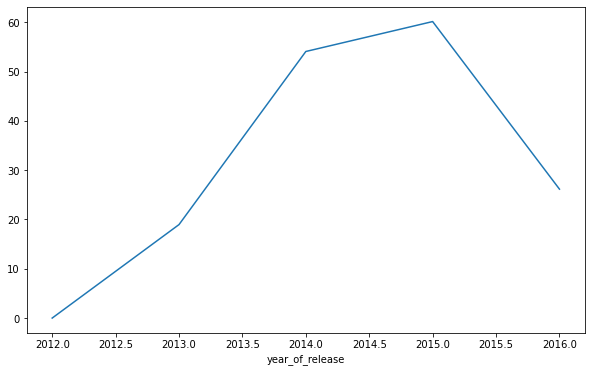

In [52]:
new_platform_year['XOne'].plot(figsize=(10, 6));

Dari platform yang ada yang memungkinkan memiliki potensi mendapatkan keuntungan di tahun 2017 ad 2 platform yaitu PS4 dan XOne.

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Platform yang memiliki penjualan tertinggi selama 5 tahun kebelakang adalah platform PS4 
2. Platform yang memiliki penjualan terendah adalah platform PSP.
3. platform yang masih memiliki potensi untuk mendapaktakan keuntungan adalah platform PS4 dan Xone.

### Analisis 5

Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform.

In [53]:
new_platform_sales = pd.pivot_table(new_df, index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'max', 'min']).reset_index()
new_platform_sales.columns = ['platform', 'total_sales', 'mean_sales', 'median_sales', 'max_sales', 'min_sales']
new_platform_sales = new_platform_sales.sort_values(by='total_sales').reset_index(drop=True)
new_platform_sales

,platform,total_sales,mean_sales,median_sales,max_sales,min_sales
0,PSP,11.19,0.064682,0.03,0.36,0.01
1,DS,12.55,0.404839,0.05,8.06,0.01
2,Wii,35.37,0.655000,0.18,6.76,0.01
3,PSV,49.18,0.119659,0.05,1.96,0.01
4,PC,62.65,0.250600,0.08,5.14,0.01
5,WiiU,82.19,0.559116,0.22,7.09,0.01
6,XOne,159.32,0.645020,0.22,7.39,0.01
7,3DS,194.61,0.491439,0.11,14.60,0.01
8,X360,236.54,0.810068,0.31,16.27,0.01
9,PS3,288.79,0.585781,0.20,21.05,0.01


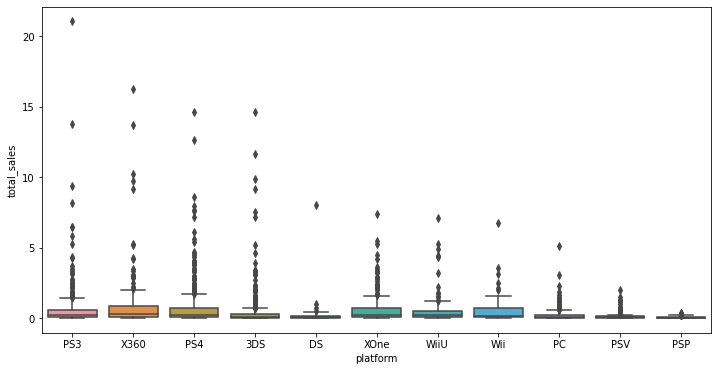

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df, x='platform', y='total_sales');

Dari 5 tahun kebelakang terdapat 11 platform game dengan penjualan yang berbeda dan cukup signifikan. Dari 11 platform yang ada, platform PS4 dan PS3 memiliki penjulan yang terbesar dengan 314.14 Dolar untuk PS4 dan 288.79 Dolar untuk PS3.  

Mari bulat grafik yang membandingkan rata-rata penjualan setiap platform.

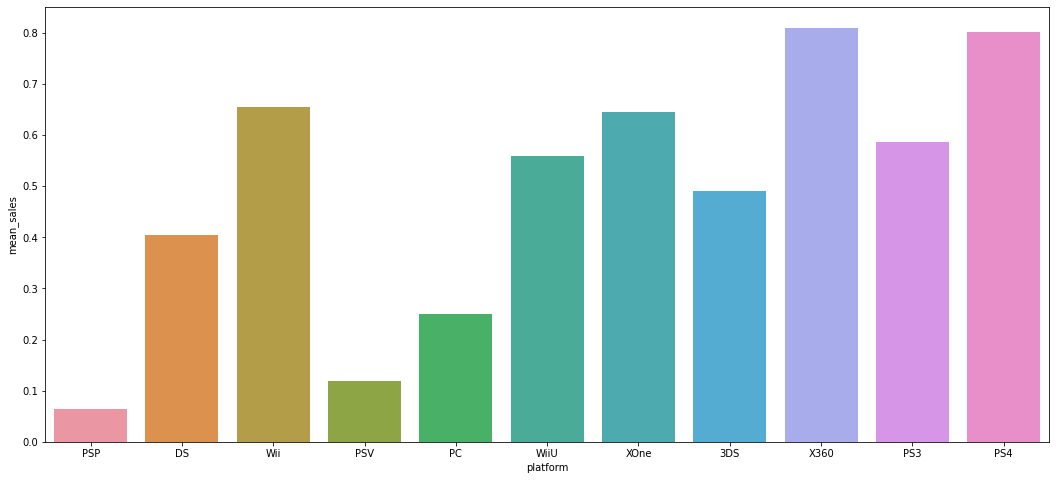

In [55]:
plt.figure(figsize=(18, 8))
sns.barplot(data=new_platform_sales, x='platform', y='mean_sales');

Terlihat dari grafik bahwa rata-rata penjualan dari setiap platform berbeda dan cukup signifikan perbedaanya. 

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Platform PS4 dan PS3 memiliki penjualan terbesar dengan 314.14 Dolar untuk PS4 dan 288.79 Dolar untuk PS3.
2. Dari segi rata-rata penjualan, platform PS4 dan XOne memiliki rata-rata penjualan yang tertinggi dibandingkan dengan platform yang lain.
3. Rata-rata penjualan dari setiap platform berbeda dan cukup signifikan perbedaanya. 

### Analisis 6

Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer. Buat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Kemudian, tarik kesimpulannya.

In [56]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Karena dari analisis seblumnya platform PS4 adalah platform dengan penjualan tertinggi, maka dari itu mari pelajari lebih lanjut tentang platform dari PS4 dan cari tahu apa yang mempengaruhi penjualanya.

In [57]:
df_PS4 = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()
df_PS4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


Data tentang PS4 sudah didapat, mari cari tahu korelasinya dengan critic score dan user score. 

Catatan untuk value dari korelasi:

1. Bila valuenya positif, artinya hubungan antar variable selaras. (bila satu naik maka yang lainya nya juga naik).
2. Bila valuenya negatif, artinya hubungan antar variable berlawanan. (bila satu naik maka yang lainya turun).
3. Bila value nya mendekati 0, artinya tidak ada korelasi.
4. 0.01-0.33 artinya korelasinya lemah.
5. 0.33-0.66 artinya korelasinya medium/menengah.
6. 0.66-1.00 artinya korelasinya tinggi.

In [58]:
df_PS4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


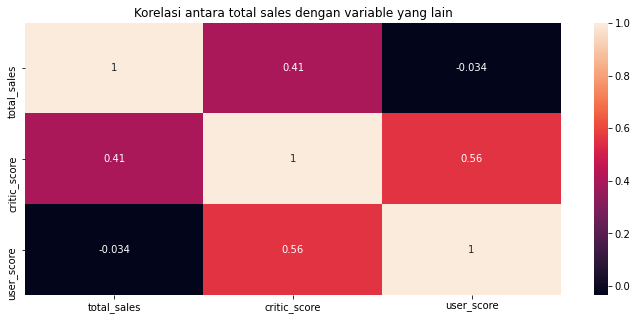

In [59]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_PS4.corr(), annot=True)
plt.title('Korelasi antara total sales dengan variable yang lain')
plt.show()

Korelasi antara total_sales dan critic_score adalah 0.41. Artinya korelasi antar 2 variable ini adalah selaras namun medium/menengah. Sedangkan korelasi antara total_sales dan user_score adalah -0.034, artinya korelasi antar 2 variable ini berlawanan atau dapat dikatakan tidak ada korelasinya.

Mari bua scatterplot dari keduanya.

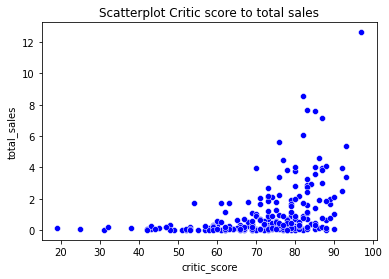

In [60]:
sns.scatterplot(data=df_PS4, x='critic_score', y='total_sales', color='blue')
plt.title('Scatterplot Critic score to total sales')
plt.show()

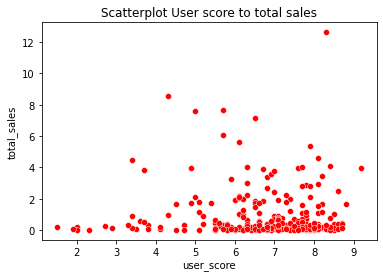

In [61]:
sns.scatterplot(data=df_PS4, x='user_score', y='total_sales', color='red')
plt.title('Scatterplot User score to total sales')
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Data yang diambil adalah data dengan platform PS4 karena PS4 memiliki penjualan tertinggi.
2. Korelasi antara total_sales dan critic_score pada platform PS4 adalah 0.41. Artinya korelasi antar 2 variable ini adalah selaras namun bersifat medium/menengah. 
3. Korelasi antara total_sales dan user_score pada PS4 adalah -0.034, artinya korelasi antar 2 variable ini berlawanan atau dapat dikatakan tidak ada korelasinya.

### Analisis 7

Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.

Mari buat tabel baru dengan platform yang berbeda namun memiliki nama game yang sama pada platform PS4. Platform yang dipilih adalah platform XOne. 

In [62]:
df_XOne = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum(
).query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()
df_XOne

,platform,name,total_sales,critic_score,user_score
0,XOne,7 Days to Die,0.05,35.0,5.2
1,XOne,Agatha Christie's The ABC Murders,0.01,66.0,7.5
2,XOne,Alien: Isolation,0.50,78.0,7.8
3,XOne,Angry Birds Star Wars,0.17,53.0,6.9
4,XOne,Assassin's Creed Syndicate,1.29,78.0,6.1
...,...,...,...,...,...
160,XOne,Wolfenstein: The Old Blood,0.15,75.0,8.0
161,XOne,Worms: WMD,0.01,75.0,8.1
162,XOne,XCOM 2,0.04,87.0,8.1
163,XOne,Zombie Army Trilogy,0.11,62.0,7.2


In [63]:
df_XOne = df_XOne[df_XOne['name'].isin(df_PS4['name'])]
df_XOne

,platform,name,total_sales,critic_score,user_score
0,XOne,7 Days to Die,0.05,35.0,5.2
1,XOne,Agatha Christie's The ABC Murders,0.01,66.0,7.5
2,XOne,Alien: Isolation,0.50,78.0,7.8
3,XOne,Angry Birds Star Wars,0.17,53.0,6.9
4,XOne,Assassin's Creed Syndicate,1.29,78.0,6.1
...,...,...,...,...,...
159,XOne,Wolfenstein: The New Order,0.68,79.0,7.8
160,XOne,Wolfenstein: The Old Blood,0.15,75.0,8.0
161,XOne,Worms: WMD,0.01,75.0,8.1
162,XOne,XCOM 2,0.04,87.0,8.1


In [64]:
df_XOne.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.394430,-0.149787
critic_score,0.394430,1.000000,0.439591
user_score,-0.149787,0.439591,1.000000


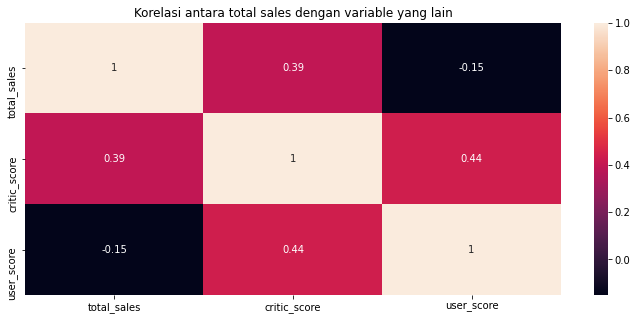

In [65]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_XOne.corr(), annot=True)
plt.title('Korelasi antara total sales dengan variable yang lain')
plt.show()

Korelasi yang ditunjukan pada platform lain kurang lebih sama dengan korelasi yang terjadi pada platform PS4. Mari buat scatterplotnya.

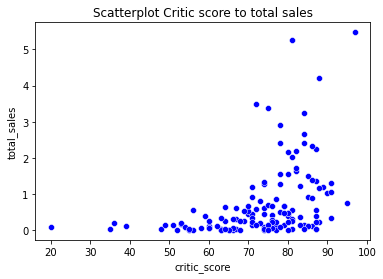

In [66]:
sns.scatterplot(data=df_XOne, x='critic_score', y='total_sales', color='blue')
plt.title('Scatterplot Critic score to total sales')
plt.show()

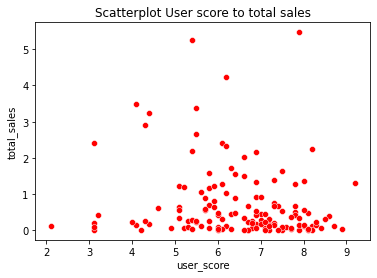

In [67]:
sns.scatterplot(data=df_XOne, x='user_score', y='total_sales', color='red')
plt.title('Scatterplot User score to total sales')
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Data yang diambil adalah data dengan platform XOne namun memiliki nama game yang sama pada platfom PS4.
2. Korelasi antara total_sales dan critic_score pada platform XOne tidak jauh berbeda dengan yang terjadi pada Platform PS4.
3. Korelasi antara total_sales dan critic_score pada platform XOne adalah 0.39. Artinya korelasi antar 2 variable ini adalah selaras namun bersifat medium/menengah.
4. Korelasi antara total_sales dan user_score pada XOne adalah -0.15, artinya korelasi antar 2 variable ini berlawanan atau dapat dikatakan tidak ada korelasinya.

### Analisis 8

Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [68]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Mari buat tabel baru untuk membadingkan genre mana yang lebih menguntungkan.

In [69]:
genre_sales = pd.pivot_table(new_df, index='genre', values='total_sales', aggfunc='sum'
                            ).sort_values(by='total_sales', ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


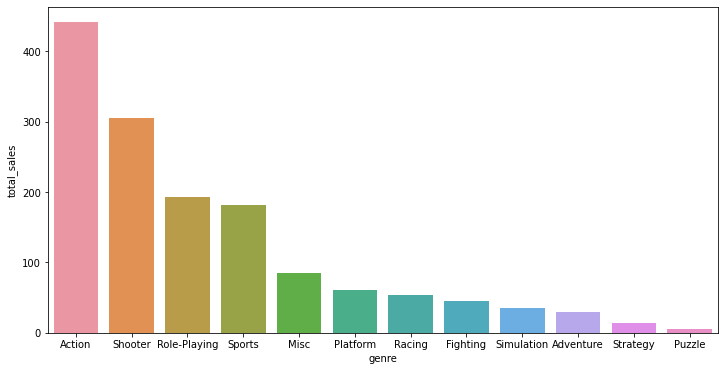

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales');

Genre dengan penjualan tertinggi adalah game dengan genre Action yang penjualannya mencapai lebih dari 400 Dolar. Genre yang paling rendah penjualannya adalah genre Puzzle yang penjualanya tidak mencapai 5 Dolar.

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Genre Action adalah genre dengan penjualan tertinggi.
2. Genre Puzzle adalah genre dengan penjualan terendah.
3. Mungkin banyak dari pengguna game yang menyukai game yang berbau adrenalin seperti genre Action, Shooter, Sport dsb.

## Tahap-5. Pemprofilan Pengguna Berdasarkan Wilayah

Mengingat bahwa data yang dimiliki dibagi menjadi 3 wilayah yang berbeda. Wilayah tersebut adalah Amerika Utara (NA), Eropa (Eu) dan Japan (JP). 

Untuk setiap wilayah (NA, EU, JP), tentukan:
1. 5 platform teratas. Jelaskan variasi pangsa pasar atau marketshare dari satu wilayah ke wilayah lainnya.
2. 5 genre teratas. Jelaskan perbedaannya.
3. Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [71]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Maketshare by Platform

Mari cari tahu seberapa besar market share dari segi platform di setiap wilayah.

In [72]:
platform_area = new_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
platform_area

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


In [73]:
platform_area['total_sales'] = platform_area[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
platform_area

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,55.31,42.64,87.79,185.74
1,DS,4.59,3.53,3.72,11.84
2,PC,19.12,37.76,0.00,56.88
3,PS3,103.38,106.86,35.29,245.53
4,PS4,108.74,141.09,15.96,265.79
5,PSP,0.13,0.42,10.47,11.02
6,PSV,10.98,11.36,21.04,43.38
7,Wii,17.45,11.92,3.39,32.76
8,WiiU,38.10,25.13,13.01,76.24
9,X360,140.05,74.52,1.57,216.14


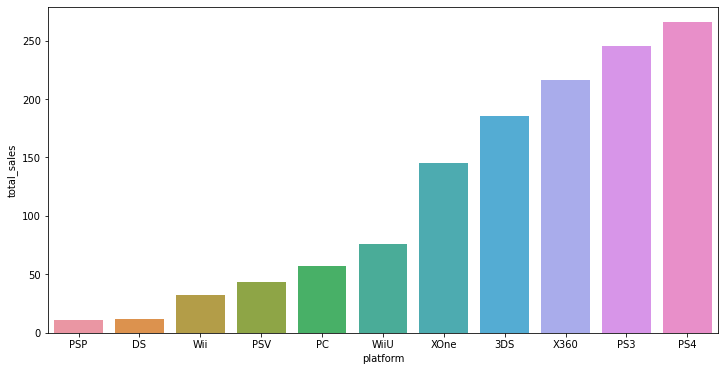

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_area.sort_values(by='total_sales') , x='platform', y='total_sales');

Total penjualan dari 3 wilayah yang ada ternyata platform PS4 adalah platform dengan penjualan tertinggi jika ketiga wilayah tersebut di jumlahkan. Mari bandingkan setiap wilayah yang ada dengan marketshare apakah masih platform PS4 yang memiliki pejualan tertinggi di setip wilayah. 

Rumus persentase marketshare adalah penjualan di setiap wilayah dibagi dengan total keseluruhan wilayah dan dikali 100.

In [75]:
platform_area['%na_MS'] = (platform_area['na_sales'] / platform_area['total_sales']) * 100
platform_area

,platform,na_sales,eu_sales,jp_sales,total_sales,%na_MS
0,3DS,55.31,42.64,87.79,185.74,29.778185
1,DS,4.59,3.53,3.72,11.84,38.766892
2,PC,19.12,37.76,0.00,56.88,33.614627
3,PS3,103.38,106.86,35.29,245.53,42.104834
4,PS4,108.74,141.09,15.96,265.79,40.911998
5,PSP,0.13,0.42,10.47,11.02,1.179673
6,PSV,10.98,11.36,21.04,43.38,25.311203
7,Wii,17.45,11.92,3.39,32.76,53.266178
8,WiiU,38.10,25.13,13.01,76.24,49.973767
9,X360,140.05,74.52,1.57,216.14,64.795966


In [76]:
platform_area['%eu_MS'] = (platform_area['eu_sales'] / platform_area['total_sales']) * 100
platform_area

,platform,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS
0,3DS,55.31,42.64,87.79,185.74,29.778185,22.956821
1,DS,4.59,3.53,3.72,11.84,38.766892,29.814189
2,PC,19.12,37.76,0.00,56.88,33.614627,66.385373
3,PS3,103.38,106.86,35.29,245.53,42.104834,43.522177
4,PS4,108.74,141.09,15.96,265.79,40.911998,53.083261
5,PSP,0.13,0.42,10.47,11.02,1.179673,3.811252
6,PSV,10.98,11.36,21.04,43.38,25.311203,26.187183
7,Wii,17.45,11.92,3.39,32.76,53.266178,36.385836
8,WiiU,38.10,25.13,13.01,76.24,49.973767,32.961700
9,X360,140.05,74.52,1.57,216.14,64.795966,34.477653


In [77]:
platform_area['%jp_MS'] = (platform_area['jp_sales'] / platform_area['total_sales']) * 100
platform_area

,platform,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS,%jp_MS
0,3DS,55.31,42.64,87.79,185.74,29.778185,22.956821,47.264994
1,DS,4.59,3.53,3.72,11.84,38.766892,29.814189,31.418919
2,PC,19.12,37.76,0.00,56.88,33.614627,66.385373,0.000000
3,PS3,103.38,106.86,35.29,245.53,42.104834,43.522177,14.372989
4,PS4,108.74,141.09,15.96,265.79,40.911998,53.083261,6.004741
5,PSP,0.13,0.42,10.47,11.02,1.179673,3.811252,95.009074
6,PSV,10.98,11.36,21.04,43.38,25.311203,26.187183,48.501614
7,Wii,17.45,11.92,3.39,32.76,53.266178,36.385836,10.347985
8,WiiU,38.10,25.13,13.01,76.24,49.973767,32.961700,17.064533
9,X360,140.05,74.52,1.57,216.14,64.795966,34.477653,0.726381


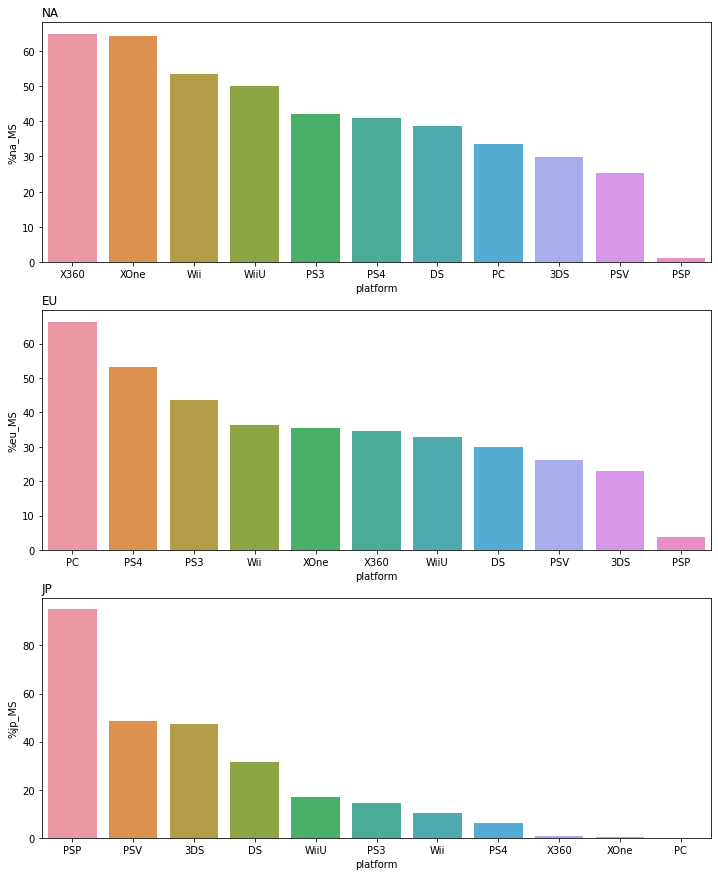

In [78]:
plt.figure(figsize=(12, 15))
plt.subplot(311)
plt.title('NA', loc='left')
sns.barplot(data=platform_area.sort_values(by='%na_MS', ascending=False), x='platform', y='%na_MS');

plt.subplot(312)
plt.title('EU', loc='left')
sns.barplot(data=platform_area.sort_values(by='%eu_MS', ascending=False) , x='platform', y='%eu_MS');

plt.subplot(313)
plt.title('JP', loc='left')
sns.barplot(data=platform_area.sort_values(by='%jp_MS', ascending=False) , x='platform', y='%jp_MS');
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
* Dari ke 3 wilayah memiliki marketshare yang berbeda beda dari segi platformnya.
* Wilayah Amerika Utara (NA) 5 platform yang memiliki marketshare tertinggi adalah:
   1. X360
   2. XOne
   3. Wii
   4. WiiU
   5. PS3
* Wilayah Eropa (EU) 5 platform yang memiliki marketshare tertinggi adalah: 
   1. PC
   2. PS4
   3. PS3
   4. WiiU
   5. XOne
* Wilayah Japan (JP) 5 platform yang memiliki marketshare tertinggi adalah:
   1. PSP
   2. PSV
   3. 3DS
   4. DS
   5. WiiU

### Maketshare by Genre

Mari cari tahu seberapa besar market share dari segi genre di setiap wilayah.

In [79]:
genre_area = new_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
genre_area

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


In [80]:
genre_area['total_sales'] = genre_area[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
genre_area

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,177.84,159.34,52.80,389.98
1,Adventure,8.92,9.46,8.24,26.62
2,Fighting,19.79,10.79,9.44,40.02
3,Misc,38.19,26.32,12.86,77.37
4,Platform,25.38,21.41,8.63,55.42
5,Puzzle,1.13,1.40,2.14,4.67
6,Racing,17.22,27.29,2.50,47.01
7,Role-Playing,64.00,48.53,65.44,177.97
8,Shooter,144.77,113.47,9.23,267.47
9,Simulation,7.97,14.55,10.41,32.93


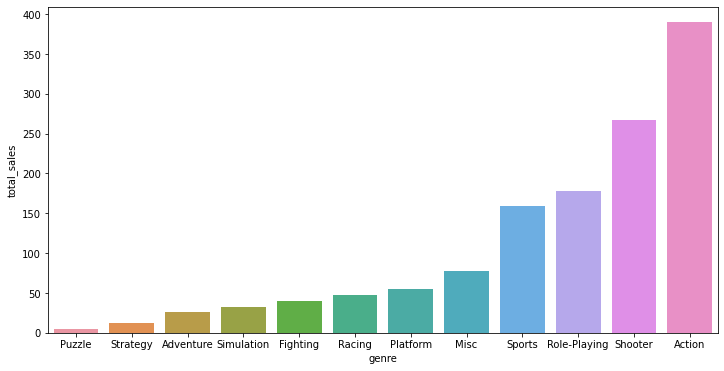

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_area.sort_values(by='total_sales') , x='genre', y='total_sales');

Total penjualan dari 3 wilayah yang ada ternyata genre Action adalah genre dengan penjualan tertinggi jika ketiga wilayah tersebut di jumlahkan. Mari bandingkan setiap wilayah yang ada dengan marketshare apakah masih genre Action yang memiliki pejualan tertinggi di setiap wilayah.

In [82]:
genre_area['%na_MS'] = (genre_area['na_sales'] / genre_area['total_sales']) * 100
genre_area

,genre,na_sales,eu_sales,jp_sales,total_sales,%na_MS
0,Action,177.84,159.34,52.80,389.98,45.602339
1,Adventure,8.92,9.46,8.24,26.62,33.508640
2,Fighting,19.79,10.79,9.44,40.02,49.450275
3,Misc,38.19,26.32,12.86,77.37,49.360217
4,Platform,25.38,21.41,8.63,55.42,45.795742
5,Puzzle,1.13,1.40,2.14,4.67,24.197002
6,Racing,17.22,27.29,2.50,47.01,36.630504
7,Role-Playing,64.00,48.53,65.44,177.97,35.961117
8,Shooter,144.77,113.47,9.23,267.47,54.125696
9,Simulation,7.97,14.55,10.41,32.93,24.202855


In [83]:
genre_area['%eu_MS'] = (genre_area['eu_sales'] / genre_area['total_sales']) * 100
genre_area

,genre,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS
0,Action,177.84,159.34,52.80,389.98,45.602339,40.858506
1,Adventure,8.92,9.46,8.24,26.62,33.508640,35.537190
2,Fighting,19.79,10.79,9.44,40.02,49.450275,26.961519
3,Misc,38.19,26.32,12.86,77.37,49.360217,34.018353
4,Platform,25.38,21.41,8.63,55.42,45.795742,38.632263
5,Puzzle,1.13,1.40,2.14,4.67,24.197002,29.978587
6,Racing,17.22,27.29,2.50,47.01,36.630504,58.051478
7,Role-Playing,64.00,48.53,65.44,177.97,35.961117,27.268641
8,Shooter,144.77,113.47,9.23,267.47,54.125696,42.423449
9,Simulation,7.97,14.55,10.41,32.93,24.202855,44.184634


In [84]:
genre_area['%jp_MS'] = (genre_area['jp_sales'] / genre_area['total_sales']) * 100
genre_area

,genre,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS,%jp_MS
0,Action,177.84,159.34,52.80,389.98,45.602339,40.858506,13.539156
1,Adventure,8.92,9.46,8.24,26.62,33.508640,35.537190,30.954170
2,Fighting,19.79,10.79,9.44,40.02,49.450275,26.961519,23.588206
3,Misc,38.19,26.32,12.86,77.37,49.360217,34.018353,16.621429
4,Platform,25.38,21.41,8.63,55.42,45.795742,38.632263,15.571996
5,Puzzle,1.13,1.40,2.14,4.67,24.197002,29.978587,45.824411
6,Racing,17.22,27.29,2.50,47.01,36.630504,58.051478,5.318017
7,Role-Playing,64.00,48.53,65.44,177.97,35.961117,27.268641,36.770242
8,Shooter,144.77,113.47,9.23,267.47,54.125696,42.423449,3.450854
9,Simulation,7.97,14.55,10.41,32.93,24.202855,44.184634,31.612511


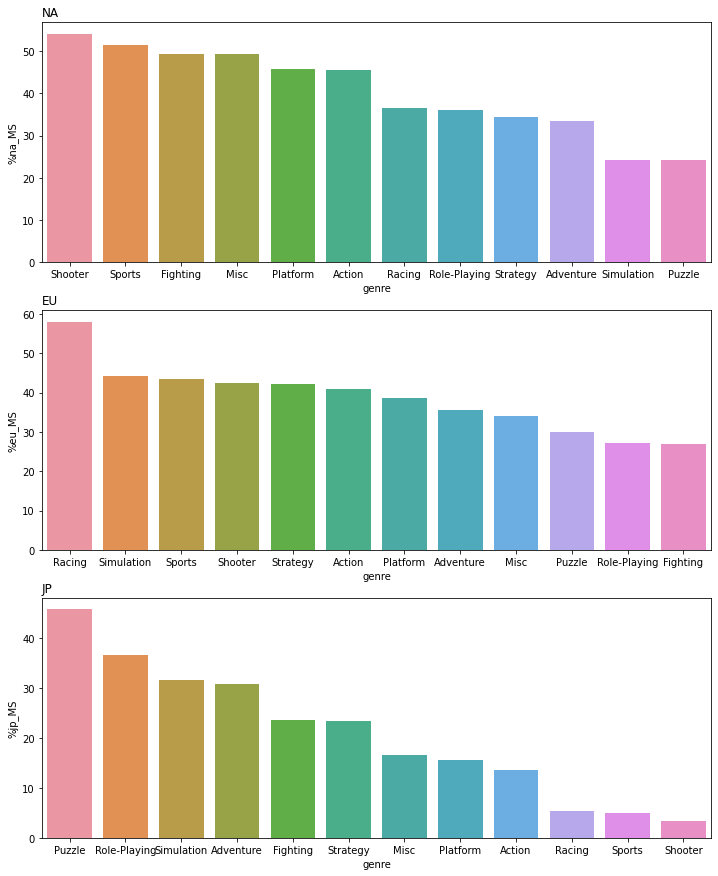

In [85]:
plt.figure(figsize=(12, 15))
plt.subplot(311)
plt.title('NA', loc='left')
sns.barplot(data=genre_area.sort_values(by='%na_MS', ascending=False), x='genre', y='%na_MS');

plt.subplot(312)
plt.title('EU', loc='left')
sns.barplot(data=genre_area.sort_values(by='%eu_MS', ascending=False) , x='genre', y='%eu_MS');

plt.subplot(313)
plt.title('JP', loc='left')
sns.barplot(data=genre_area.sort_values(by='%jp_MS', ascending=False) , x='genre', y='%jp_MS');
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:

- Dari ke 3 wilayah memiliki marketshare yang berbeda beda dari segi genrenya.
- Wilayah Amerika Utara (NA) 5 genre yang memiliki marketshare tertinggi adalah:
    1. Shooter
    2. Sports
    3. Fighting
    4. Misc
    5. Platform
- Wilayah Eropa (EU) 5 genre yang memiliki marketshare tertinggi adalah:
    1. Racing
    2. Simulation
    3. Sports
    4. Shooter
    5. Strategy
- Wilayah Japan (JP) 5 genre yang memiliki marketshare tertinggi adalah:
    1. Puzzle
    2. Role-Playing
    3. Simulation
    4. Adventure
    5. Fighting

### Maketshare by Rating

Mari cari tahu seberapa besar marketshare dari segi Rating di setiap wilayah, apakah rating ESRB memengaruhi penjualan di masing-masing wilayah.

In [86]:
rating_area = new_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_area

,rating,na_sales,eu_sales,jp_sales
0,0,103.31,91.50,108.84
1,E,114.37,113.03,28.33
2,E10+,75.70,55.37,8.19
3,M,231.57,193.96,21.20
4,T,66.02,52.96,26.02


In [87]:
rating_area['total_sales'] = rating_area[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
rating_area

,rating,na_sales,eu_sales,jp_sales,total_sales
0,0,103.31,91.50,108.84,303.65
1,E,114.37,113.03,28.33,255.73
2,E10+,75.70,55.37,8.19,139.26
3,M,231.57,193.96,21.20,446.73
4,T,66.02,52.96,26.02,145.00


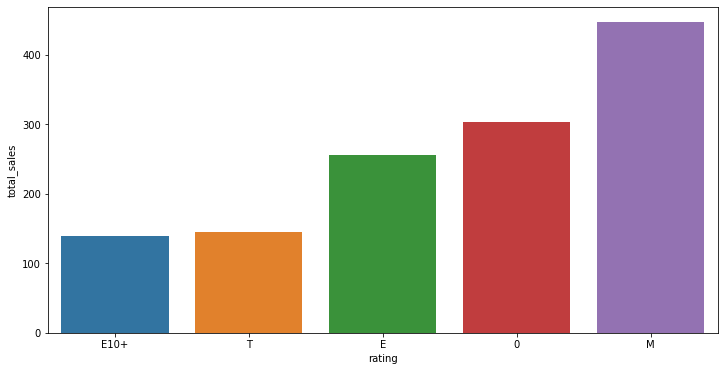

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_area.sort_values(by='total_sales') , x='rating', y='total_sales');

Total penjualan dari 3 wilayah yang ada ternyata rating M adalah rating dengan penjualan tertinggi jika ketiga wilayah tersebut di jumlahkan. Mari bandingkan setiap wilayah yang ada dengan marketshare apakah masih rating M yang memiliki pejualan tertinggi di setiap wilayah.

In [89]:
rating_area['%na_MS'] = (rating_area['na_sales'] / rating_area['total_sales']) * 100
rating_area

,rating,na_sales,eu_sales,jp_sales,total_sales,%na_MS
0,0,103.31,91.50,108.84,303.65,34.022724
1,E,114.37,113.03,28.33,255.73,44.722950
2,E10+,75.70,55.37,8.19,139.26,54.358753
3,M,231.57,193.96,21.20,446.73,51.836680
4,T,66.02,52.96,26.02,145.00,45.531034


In [90]:
rating_area['%eu_MS'] = (rating_area['eu_sales'] / rating_area['total_sales']) * 100
rating_area

,rating,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS
0,0,103.31,91.50,108.84,303.65,34.022724,30.133377
1,E,114.37,113.03,28.33,255.73,44.722950,44.198960
2,E10+,75.70,55.37,8.19,139.26,54.358753,39.760161
3,M,231.57,193.96,21.20,446.73,51.836680,43.417724
4,T,66.02,52.96,26.02,145.00,45.531034,36.524138


In [91]:
rating_area['%jp_MS'] = (rating_area['jp_sales'] / rating_area['total_sales']) * 100
rating_area

,rating,na_sales,eu_sales,jp_sales,total_sales,%na_MS,%eu_MS,%jp_MS
0,0,103.31,91.50,108.84,303.65,34.022724,30.133377,35.843899
1,E,114.37,113.03,28.33,255.73,44.722950,44.198960,11.078090
2,E10+,75.70,55.37,8.19,139.26,54.358753,39.760161,5.881086
3,M,231.57,193.96,21.20,446.73,51.836680,43.417724,4.745596
4,T,66.02,52.96,26.02,145.00,45.531034,36.524138,17.944828


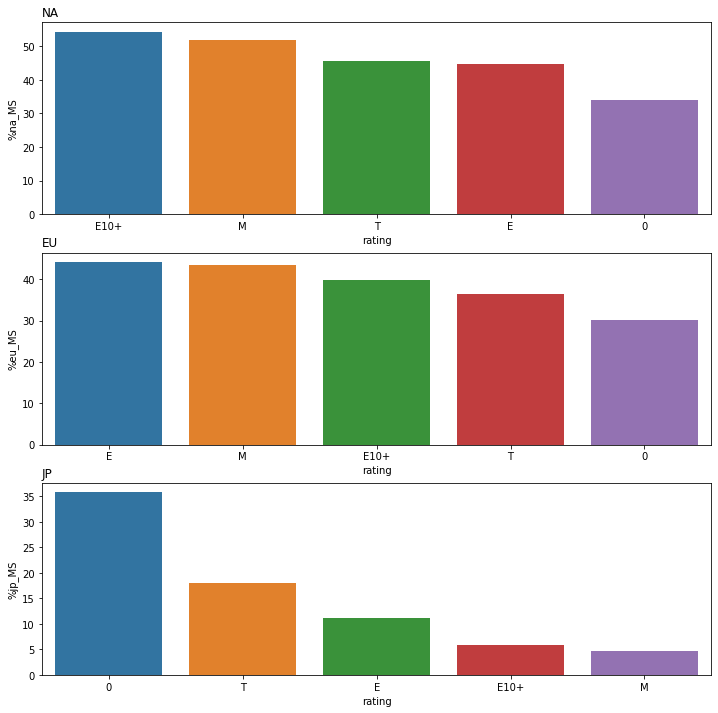

In [92]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
plt.title('NA', loc='left')
sns.barplot(data=rating_area.sort_values(by='%na_MS', ascending=False), x='rating', y='%na_MS');

plt.subplot(312)
plt.title('EU', loc='left')
sns.barplot(data=rating_area.sort_values(by='%eu_MS', ascending=False) , x='rating', y='%eu_MS');

plt.subplot(313)
plt.title('JP', loc='left')
sns.barplot(data=rating_area.sort_values(by='%jp_MS', ascending=False) , x='rating', y='%jp_MS');
plt.show()

**Kesimpulan**

Ada beberapa kesimpulan dari analisis ini yaitu:
1. Ketiga wilayah memiliki nilai marketsahre yang beragam.
2. Persentase marketsahre tertinggi dari segi rating adalah wilayah NA dengan nilai lebih dari 50%.
3. Pada wilayah NA rating dengan nilai marketshare tertinggi adalah rating E10+ dan yang terendah adalah rating 0 (rating tidak diketahui).
4. Pada wilayah EU rating dengan nilai marketshare tertinggi adalah rating E dan yang terendah adalah rating 0 (rating tidak diketahui).
5. Pada wilayah JP rating dengan nilai marketshare tertinggi adalah rating 0 (rating tidak diketahui) dan yang terendah adalah rating M.
6. Teryata rating ESRB sangat mempengaruhi penjualan di setiap wilayah dengan pengguna game yang beragam dari wilayah-wilayah tersebut. Contoh pada wilayah NA, pengguna game kebanyakan adalah remaja keatas atau lebih dari 10 tahun, sedangkan pada wilayah EU, pengguna game kebanyakan adalah semua umur (all age).  

## Tahap-6. Uji Hipotesis

Dari analisis yang telah dilakukan, mari coba uji beberapa hipotesis dari data yang ada. Hipotesis yang akan diuji adalah sebagai berikut:
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 
2. Rata-rata rating pengguna genre Action dan Sports berbeda.


### Uji Hipotesis 1

Sebelum melakukan pengujian pertama ini, mari persiapkan dataset yang akan digunakan sebagai data  pengujian hipotesis.

In [93]:
new_df1 = data.loc[data['year_of_release'] >= 2012].reset_index(drop=True)
new_df1.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
633,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN,0.51
2806,Teenage Mutant Ninja Turtles (3DS),3DS,2013,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
2412,Demon Gaze 2,PSV,2014,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
2151,Mobile Suit Gundam: Mokuba no Kiseki,PSP,2012,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
2645,Romance of the Three Kingdoms XII,WiiU,2012,Strategy,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02


Dataset untuk platform XOne 

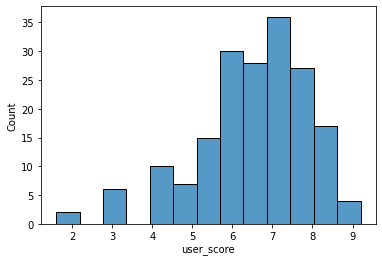

In [94]:
df_XOne = new_df1.loc[(new_df1['platform']=='XOne') & (new_df1['user_score'].notnull()), 'user_score']
sns.histplot(df_XOne)
plt.show()

Dataset untuk platform PC

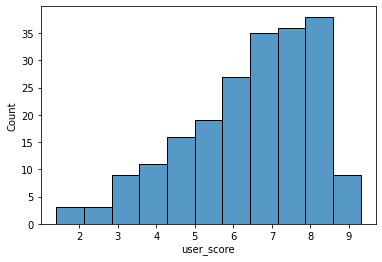

In [95]:
df_PC = new_df1.loc[(new_df1['platform']=='PC') & (new_df1['user_score'].notnull()),'user_score']
sns.histplot(df_PC)
plt.show()

Dataset untuk pengujian sudah perhasil dibuat. Sebelum kepengujiannya, mari lakukan cek distribusi kenormalan dataset yang ada agar saat pengujian dapat diketahui metode mana yang akan digunakan.

Untuk mempermudah proses pengecekan kenormalan data, karena pengujian hipotesisnya ada 2. Mari buat function cek ditribusi kenormalan data agar mempermudah langkah kedepannya. Untuk nilai dari tingkat signifikansi statistik kritis atau alpha, mari set di 5%.

In [96]:
def normality_test(series):
    p_value_shapiro = shapiro(series).pvalue
    alpha = 0.05
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha: {alpha}')
    if p_value_shapiro >= alpha:
        print('H0 diterima: Distribusi data tersebut normal.')
    else:
        print('H1 diterima: Distribusi data tersebut tidak normal.')

Function sudah dibuat, mari cari tahu distribusi kenormalan datanya.

In [97]:
print('XOne')
normality_test(df_XOne)
print('---------------------------------------------------------')
print('PC')
normality_test(df_PC)

XOne
P-Value: 1.524856543255737e-05
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.
---------------------------------------------------------
PC
P-Value: 1.141219598821408e-07
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.


Dari hasil yang ditampilkan, didapat bahwa kedua dataset memiliki P-Value yang sangat kecil. Hasil dari pengecekan distribusi kenormalan dari kedua dataset menyatakan bahwa ternyata kedua dataset tersebut memiliki distribusi data tidak normal. Maka dari itu pengujian hipotesis harus dilakukan dengan menggunkan metode NonParametric Test.

Mari masuk ke pengujian hipotesisnya. Sebelum itu ada beberapa rumusan yang harus dicatat, diantaranya:

1. Pengujian dilakukan menggunakan Two Independent Samples dengan metode Mann-Whitney U test.
2. Nilai tingkat signifikansi statistik kritis atau alpha di set pada 5%.
3. Uji Hipotesisnya :
    - H0 Diterima: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.
    - H1 Diterima: Rata-rata rating pengguna platform Xbox One dan PC adalah BERBEDA.
    
Mari bandingkan langsung hasil dari P-Value dari kedua dataset yang akan ada.

In [98]:
alpha = 0.05
p_value = mannwhitneyu(df_XOne, df_PC, nan_policy='omit').pvalue
print(f'Alpha: {alpha}')
print(f'P_Value: {p_value}')
print(f'Rata-rata User Score XOne: {df_XOne.mean()}')
print(f'Rata-rata User_score PC: {df_PC.mean()}')
print('-------------------------------------------------------------------------------------')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA ')
else:
    print('H1 Diterima: Rata-rata rating pengguna platform Xbox One dan PC adalah BERBEDA')
    

Alpha: 0.05
P_Value: 0.8649062974699414
Rata-rata User Score XOne: 6.521428571428572
Rata-rata User_score PC: 6.4286407766990274
-------------------------------------------------------------------------------------
H0 Diterima: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA 


Mari visualisasikan keduanya secara bersamaan.

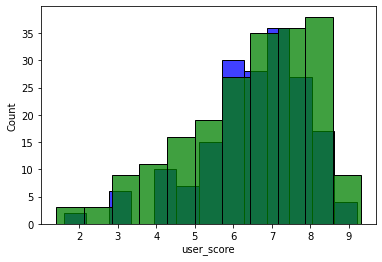

In [99]:
sns.histplot(df_XOne, color='blue')
sns.histplot(df_PC, color='green')
plt.show()

findings:

- Uji hipotesis statistik rating pengguna platform Xbox One dan PC memiliki nilai P-Value yaitu 0.86.
- Rata-rata rating pengguna platform Xbox One dan PC memiliki nilai yang kurang lebih mirip yaitu sekitar 6.5

insights:

- Dilihat dari hasil rata-rata rating pengguna dari kedua platform yang ada, keduanya memiliki rata-rata rating pengguna yang tidak jauh berbeda dengan begitu secara uji statistik menyatakan bahwa rata-rata dari kedua paket yang ada adalah SAMA.

### Uji Hipotesis 2

Sebelum melakukan pengujian kedua ini, sama seeprti sebelumnya mari persiapkan dataset yang akan digunakan sebagai data pengujian hipotesis.

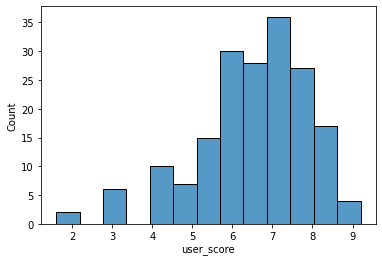

In [100]:
df_Action = new_df1.loc[(new_df1['genre']=='Action') & (new_df1['user_score'].notnull()), 'user_score']
sns.histplot(df_XOne)
plt.show()

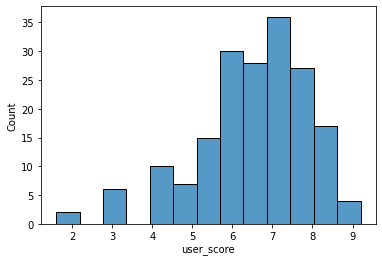

In [101]:
df_Sports = new_df1.loc[(new_df1['genre']=='Sports') & (new_df1['user_score'].notnull()), 'user_score']
sns.histplot(df_XOne)
plt.show()

Dataset untuk pengujian sudah perhasil dibuat. Sebelum kepengujiannya, mari lakukan hal yang sama seperti sebleumnya yaitu melakukan cek distribusi kenormalan dataset yang ada agar saat pengujian dapat diketahui metode mana yang akan digunakan.


In [102]:
print('Acrtion')
normality_test(df_Action)
print('---------------------------------------------------------')
print('Sports')
normality_test(df_Sports)

Acrtion
P-Value: 8.147253239358982e-17
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.
---------------------------------------------------------
Sports
P-Value: 0.0002625079359859228
Alpha: 0.05
H1 diterima: Distribusi data tersebut tidak normal.


Dari hasil yang ditampilkan, didapat bahwa kedua dataset memiliki P-Value yang sangat kecil. Hasil dari pengecekan distribusi kenormalan dari kedua dataset menyatakan bahwa ternyata kedua dataset tersebut memiliki distribusi data tidak normal. Maka dari itu pengujian hipotesis harus dilakukan dengan menggunkan metode NonParametric Test.

Mari masuk ke pengujian hipotesisnya. Sebelum itu ada beberapa rumusan yang harus dicatat, diantaranya:

1. Pengujian dilakukan menggunakan Two Independent Samples dengan metode Mann-Whitney U test.
2. Nilai tingkat signifikansi statistik kritis atau alpha di set pada 5%.
3. Uji Hipotesisnya :
    - H0 Diterima: Rata-rata rating pengguna genre Action dan Sports SAMA.
    - H1 Diterima: Rata-rata rating pengguna genre Action dan Sports BERBEDA.

Mari bandingkan langsung hasil dari P-Value dari kedua dataset yang akan ada.

In [103]:
alpha = 0.05
p_value = mannwhitneyu(df_Action, df_Sports, nan_policy='omit').pvalue
print(f'Alpha: {alpha}')
print(f'P_Value: {p_value}')
print(f'Rata-rata User Score Action: {df_Action.mean()}')
print(f'Rata-rata User_score Sports: {df_Sports.mean()}')
print('-------------------------------------------------------------------------------------')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata rating pengguna genre Action dan Sports SAMA')
else:
    print('H1 Diterima: Rata-rata rating pengguna genre Action dan Sports BERBEDA')
    

Alpha: 0.05
P_Value: 1.1428765201928685e-23
Rata-rata User Score Action: 6.825047801147227
Rata-rata User_score Sports: 5.455897435897437
-------------------------------------------------------------------------------------
H1 Diterima: Rata-rata rating pengguna genre Action dan Sports BERBEDA


Mari coba visualisasikan kedua dataset agar lebih terlihat perbedaanya.

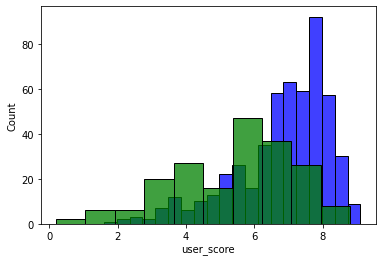

In [104]:
sns.histplot(df_Action, color='blue')
sns.histplot(df_Sports, color='green')
plt.show()

findings:

- Uji statistik rata-rata rating pengguna genre Action dan Sports memiliki nilai P-Value yang sangat kecil.
- Rata-rata rating pengguna genre Action lebih besar dibandingkan dengan rating pengguna genre Sports. Untuk genre Action memiliki rata-rata rating pengguna yaitu 6.82, sedangkan untuk genre Sports memiliki rata-rata rating pengguna yaitu 5.45.

insights:

- Terlihat dari hasil yang ditampilkan bahwa rata-rata rating pengguna dari genre Action lebih besar dibandingkan dengan genre Sports. Dari grafik yang ditampilkan juga terlihat sangat berbeda. Maka dari itu hasil dari uji statistik menyatakan bahwa rata-rata rating pengguna genre Action dan Sports itu BERBEDA.

## Tahap-7. Kesimpulan Umum

### Kesimpulan Data dan Analisis Data

Ada beberapa kesimpulan dari proses analisis yang telah dilakukan, yaitu:
1. Permasalahan pertama yang ditemukan adalah nama kolom di dataframe tidak seragam. Permasalahan ini diatasi dengan merubah semua nama kolom dengan huruf kecil agar semua seragam. 
2. Permasalah lain yaitu terdapat banyak missing value di dataframe yang ada. Permasalahan ini diatasi dengan beberapa cara, untuk persentase missing value yang tergolong sangat kecil nilainya, data didrop. Untuk persentase missing value yang tergolong sangat besar nilainya, data semetara di biarkan terlebih dahulu. 
3. Untuk persentase missing value yang tergolong sangat besar nilainya, untuk keperluan analisis data semetara di isi dengan angka 0. Cara ini dipilih untuk menandakan bahwa data itu tidak diketahui nilainya.

4. Dari tahun ke tahun perkembangan game cukup fluktuatif, namun terlihat game yang ada cenderung naik setiap tahunnya. Puncak dari banyak nya game yang dirilis berada pada tahun 2008 dan 2009 dengan jumlah game lebih dari 1400 game. Pada tahun 2009-2016 jumlah game yang rilis cenderung menurun setiap tahunnya. Game yang dirilis pada 5 tahun terakhir cenderung signifikan negarif atau mengalami penurunan dengan fluktuasi yang beragam. 

5. PS2 adalah platform yang memiliki penjualan tertinggi dengan nilai penjualan sekitar lebih dari 1200. Tahun 2004 adalah puncak dari penjualan di platform PS2 dengan penjualan lebih dari 210 Dolar. Analisi untuk rentang waktu pada saat platform itu populer adalah sekitar 10 tahun. 5 tahun adalah dimana platfrom beranjak naik hingga populer dan 5 tahun kemudian adalah dimana platform beranjak turun hingga menjadi kurang populer.

6. Dari hasil analisis sebelumnya menyatakan bahwa rentang waktu game populer hingga tidak populer adalah 10 tahun. 5 tahun adalah proses dimana game menuju populer dan 5 tahun lagi adalah proses dimana game mengalami penurunan. Rentang waktu yang diambil untuk memodelkan game pada tahun 2017 adalan 5 tahun. Pengambilan data diambil dari tahun 2012-2016 agar data yang digunakan masih relevan.

7. Dari tahun 2012-2016 platform PS4 dan PS3 memiliki penjualan terbesar dengan 314.14 Dolar untuk PS4 dan 288.79 Dolar untuk PS3. Dari segi rata-rata penjualan, platform PS4 dan XOne memiliki rata-rata penjualan yang tertinggi dibandingkan dengan platform yang lain. Rata-rata penjualan dari setiap platform berbeda dan cukup signifikan perbedaanya.

8. Karena platform PS4 memiliki penjualan tertinggi. Maka data ini yang diambil untuk mencari korelasi antar variable nya. Korelasi antara total_sales dan critic_score pada platform PS4 adalah 0.41. Artinya korelasi antar 2 variable ini adalah selaras namun bersifat medium/menengah. Korelasi antara total_sales dan user_score pada PS4 adalah -0.034, artinya korelasi antar 2 variable ini berlawanan atau dapat dikatakan tidak ada korelasinya.

9. Genre Action adalah genre dengan penjualan tertinggi. Genre Puzzle adalah genre dengan penjualan terendah. Mungkin banyak dari pengguna game yang menyukai game yang berbau adrenalin seperti genre Action, Shooter, Sport dsb.

10. Dari ke 3 wilayah memiliki marketshare yang berbeda beda dari segi platformnya. Wilayah Amerika Utara (NA) 5 platform yang memiliki marketshare tertinggi adalah: X360, XOne, Wii, WiiU, PS3. Wilayah Eropa (EU) 5 platform yang memiliki marketshare tertinggi adalah: PC, PS4, PS3, WiiU, XOne. Wilayah Japan (JP) 5 platform yang memiliki marketshare tertinggi adalah: PSP, PSV, 3DS, DS, WiiU.

11. Dari ke 3 wilayah memiliki marketshare yang berbeda beda dari segi genrenya. Wilayah Amerika Utara (NA) 5 genre yang memiliki marketshare tertinggi adalah: Shooter, Sports, Fighting, Misc, Platform. Wilayah Eropa (EU) 5 genre yang memiliki marketshare tertinggi adalah: Racing, Simulation, Sports ,Shooter, Strategy. Wilayah Japan (JP) 5 genre yang memiliki marketshare tertinggi adalah: Puzzle, Role-Playing, Simulation, Adventure, Fighting.

12. Ketiga wilayah memiliki nilai marketsahre yang beragam. Persentase marketsahre tertinggi dari segi rating adalah wilayah NA dengan nilai lebih dari 50%. Pada wilayah NA rating dengan nilai marketshare tertinggi adalah rating E10+ dan yang terendah adalah rating 0 (rating tidak diketahui). Pada wilayah EU rating dengan nilai marketshare tertinggi adalah rating E dan yang terendah adalah rating 0 (rating tidak diketahui). Pada wilayah JP rating dengan nilai marketshare tertinggi adalah rating 0 (rating tidak diketahui) dan yang terendah adalah rating M. Teryata rating ESRB sangat mempengaruhi penjualan di setiap wilayah dengan pengguna game yang beragam dari wilayah-wilayah tersebut. Contoh pada wilayah NA, pengguna game kebanyakan adalah remaja keatas atau lebih dari 10 tahun, sedangkan pada wilayah EU, pengguna game kebanyakan adalah semua umur (all age).


### Kesimpulan Uji Hipotesis

Ada beberapa kesimpulan dari uji hipotesis yang telah dilakukan, diantaranya:

1. Dari hasil pengecekan distribusi kenormalan data, dataset yang menjadi bahan pengujian memiliki P-Value yang sangat kecil artinya dataset memiliki distribusi data yang tidak normal. Maka dari itu pengujian hipotesis keduanya harus dilakukan dengan menggunakan NonParametric Test dan menggunakan metode Mann-Whitney U Test.
2. Nilai dari tingkat signifikansi statistik kritis atau alpha pada kedua uji hiptesis adalah 5%.
3. Uji hipotesis telah dilakukan dengan 2 pengujian dan perumusan hipotesis sebagai berikut:
* Rata-rata rating pengguna platform Xbox One dan PC.
  - H0: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.
  - H1: Rata-rata rating pengguna platform Xbox One dan PC adalah BERBEDA.
* Rata-rata rating pengguna genre Action dan Sports.
  - H0: Rata-rata rating pengguna genre Action dan Sports BERBEDA.
  - H1: Rata-rata rating pengguna genre Action dan Sports BERBEDA.
4. Hasil dari uji hipotesis menyatakan bahwa:
    - Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.
    - Rata-rata rating pengguna genre Action dan Sports BERBEDA.